<a href="https://colab.research.google.com/github/RyanDDo/Project/blob/Project-3/ANALYZE%20AND%20PREDICT%20DATA%20ON%20CUSTOMER%20BEHAVIOR%20FOR%20CREDIT%20CARD%20FRAUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('creditcard.csv')
df.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

XỬ LÝ DATA

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.duplicated().sum()

1081

In [ ]:
df1 = df.drop_duplicates()

In [ ]:
df1['Time'].max()

172792.0

In [ ]:
df1.duplicated().sum()

0

Visualization

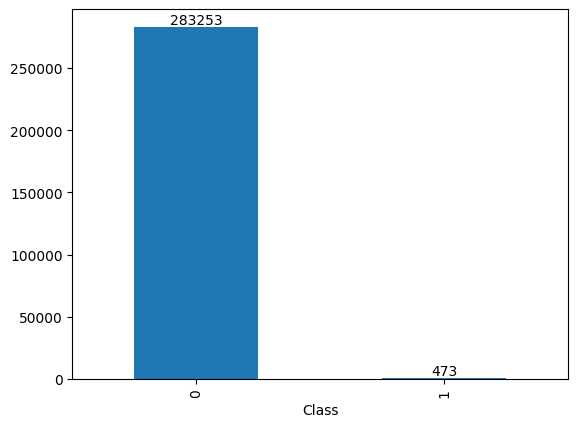

In [ ]:
df1.value_counts(df1.Class).plot.bar(color='steelblue')
ax =df1.value_counts(df1.Class).plot(kind='bar')
for i, v in enumerate(df1.value_counts(df1.Class)):
    ax.text(i, v, str(v), ha='center', va='bottom')

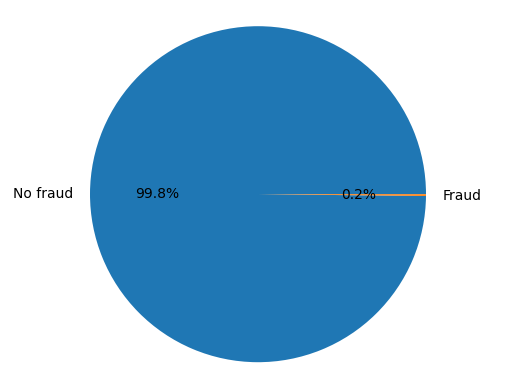

In [ ]:
ax =df1.value_counts(df1.Class)
plt.pie(ax, labels=['No fraud','Fraud'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

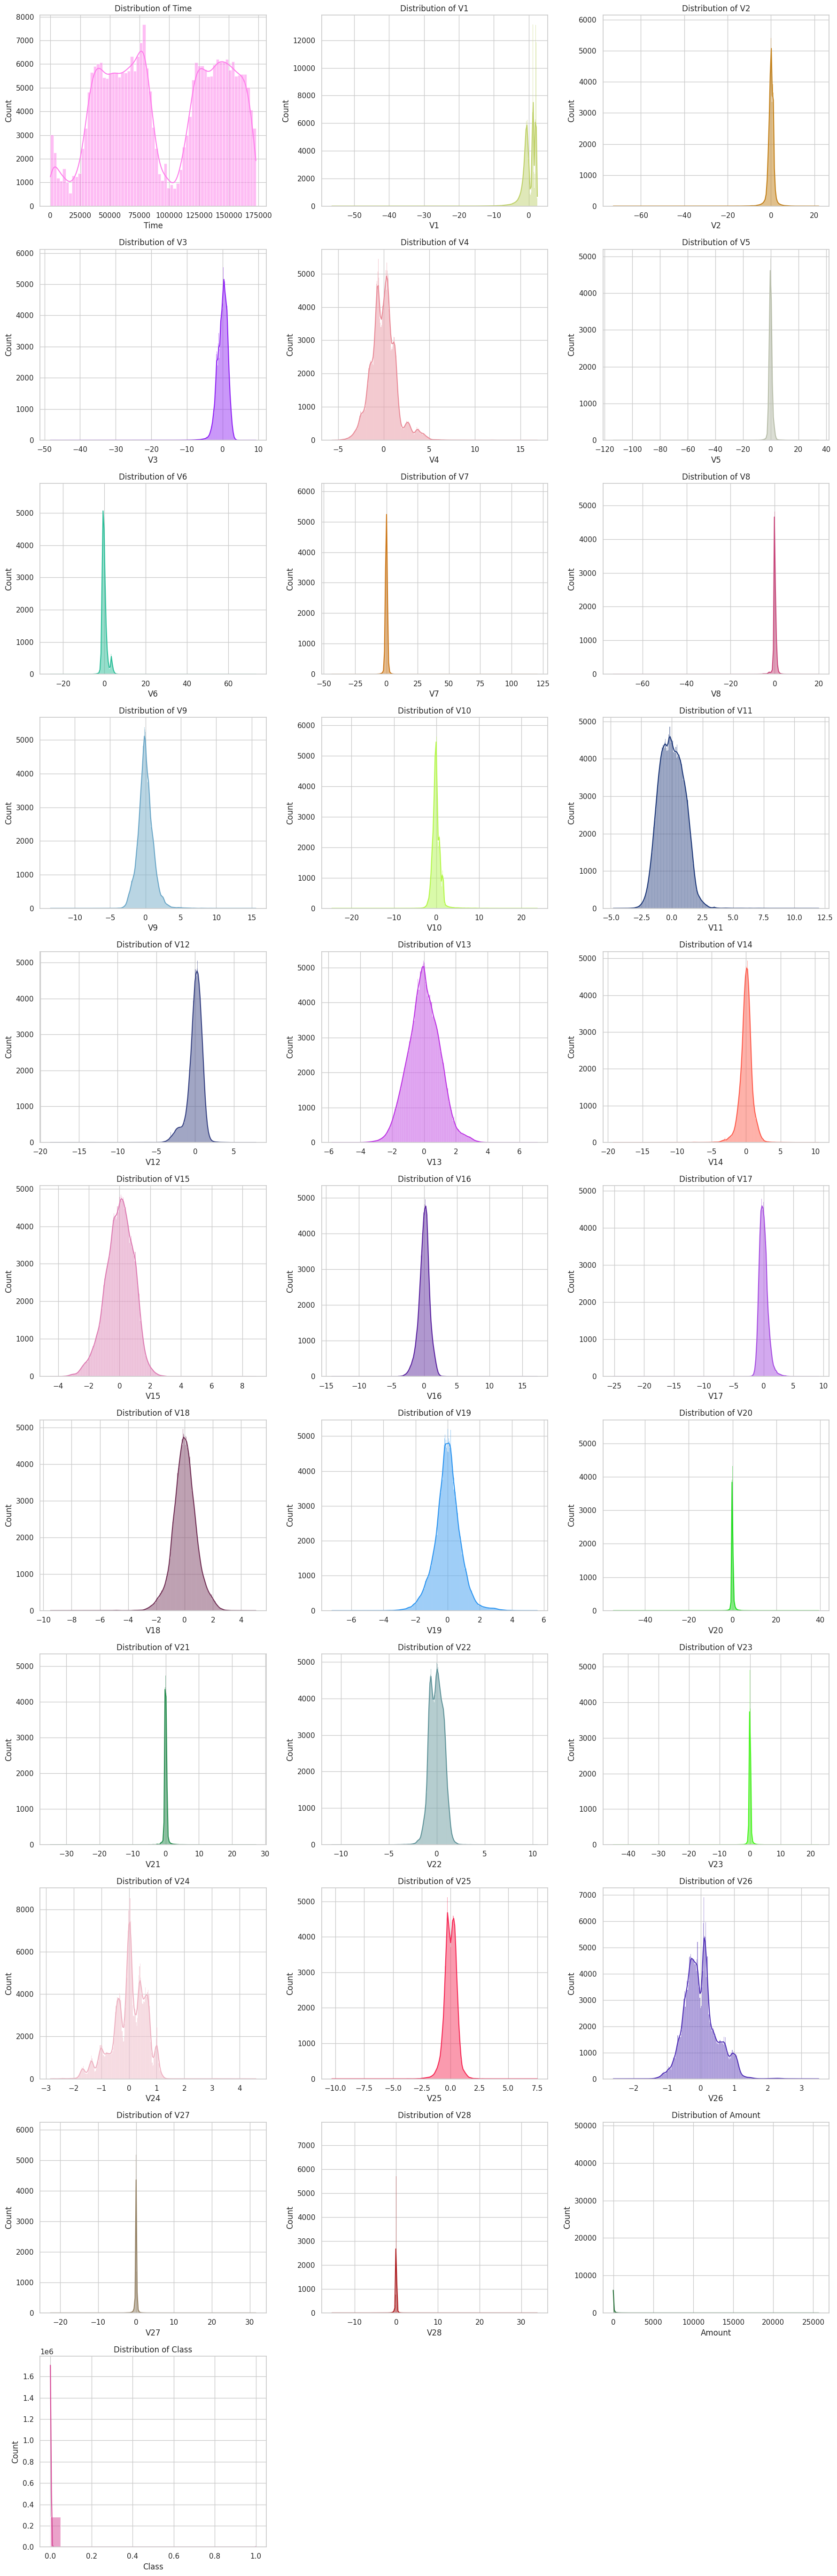

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

num_columns = len(df1.columns)
rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calculate needed rows of subplots

fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))  # Adjust size as needed
axes = axes.flatten()  # Flatten if more than one row

for i, col in enumerate(df1.columns):
    sns.histplot(df1[col], kde=True, ax=axes[i], color=np.random.rand(3,))
    axes[i].set_title(f'Distribution of {col}')

for ax in axes[num_columns:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
df1['Time'].describe()

count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

Đổi cột Time sang định dạng 24h

In [ ]:
df1.Time = df1.Time / 3600

<ipython-input-34-48930fa2f0a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Time = df1.Time / 3600


<ipython-input-36-782cf585bd57>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.Time, bins=48, kde=False)


Text(0.5, 1.0, 'Transaction Times')

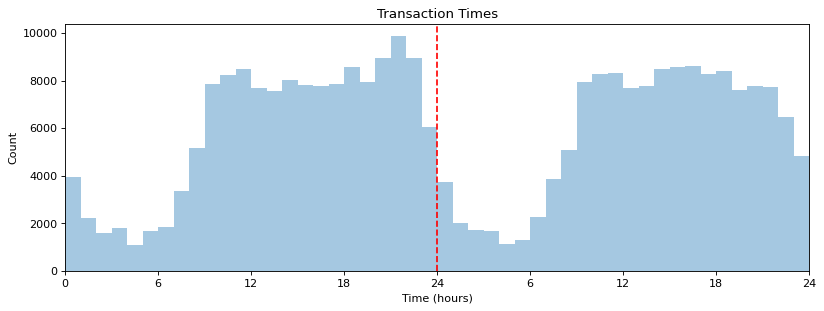

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df1.Time, bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,49,6), np.hstack((np.arange(0, 30, 6), np.arange(6, 30, 6))).astype(str))
plt.axvline(x=24, color='r', linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Count')
plt.title('Transaction Times')

In [ ]:
fraud = df1[df1['Class']==1]
not_fraud = df1[df1['Class']==0]

<ipython-input-38-2e3df9226858>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud.Time, bins=48, kde=False)


Text(0.5, 1.0, 'Transaction Times')

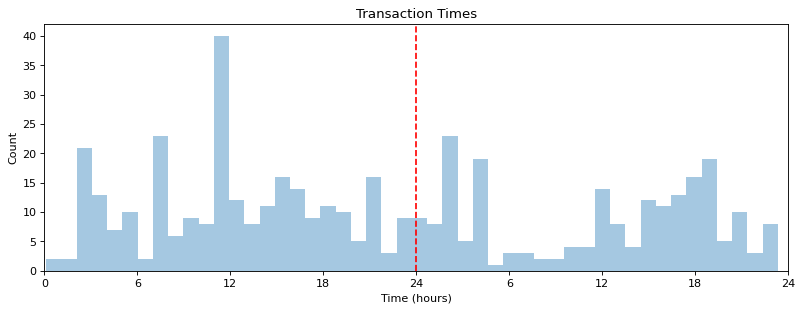

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(fraud.Time, bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,49,6), np.hstack((np.arange(0, 30, 6), np.arange(6, 30, 6))).astype(str))
plt.axvline(x=24, color='r', linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Count')
plt.title('Transaction Times')

Các giao dịch gian lận không có chu kì

<ipython-input-39-30f69f14f377>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_fraud.Time, bins=48, kde=False)


Text(0.5, 1.0, 'Transaction Times')

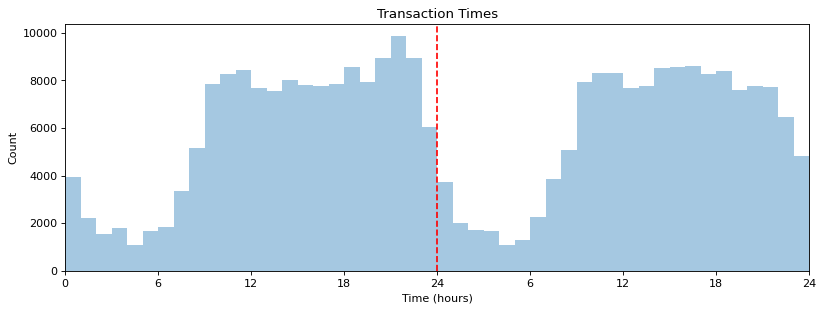

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(not_fraud.Time, bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,49,6), np.hstack((np.arange(0, 30, 6), np.arange(6, 30, 6))).astype(str))
plt.axvline(x=24, color='r', linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Count')
plt.title('Transaction Times')

Giao dịch bình thường biến động theo chu kì

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


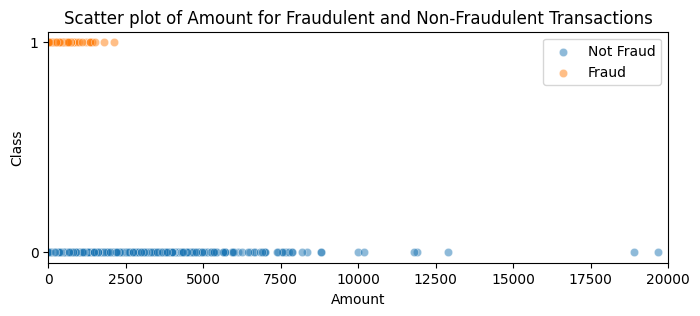

In [ ]:
plt.figure(figsize=(8, 3))
plt.title('Scatter plot of Amount for Fraudulent and Non-Fraudulent Transactions')
sns.scatterplot(data=not_fraud, x='Amount', y='Class', label='Not Fraud', alpha=0.5)
sns.scatterplot(data=fraud, x='Amount', y='Class', label='Fraud', alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend()
plt.xlim((0, 20000))
plt.yticks([0, 1], ['0', '1'])

plt.show()

Giao dịch gian lận hầu như < 2500

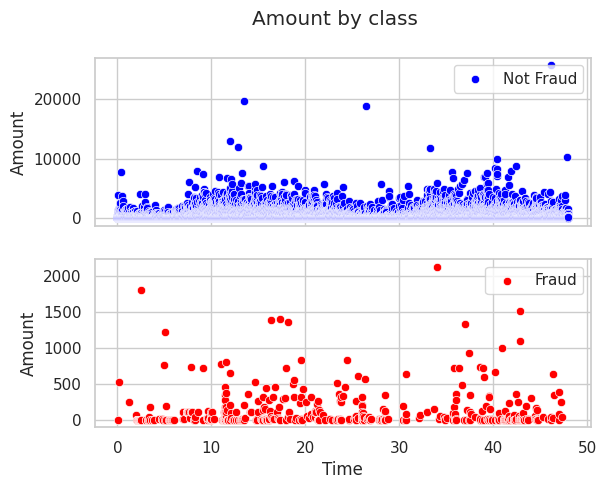

In [ ]:
fig, axes = plt.subplots(2,1,sharex=True)
fig.suptitle('Amount by class')
sns.scatterplot(data=not_fraud, x='Time', y='Amount', label='Not Fraud', color='blue', ax=axes[0])
sns.scatterplot(data=fraud, x='Time', y='Amount', label='Fraud', color='red', ax=axes[1])
plt.show()

Fraudulent transactions with lower amounts happen at the same time as regular transactions, suggesting time alone may not show if a transaction is fraud.

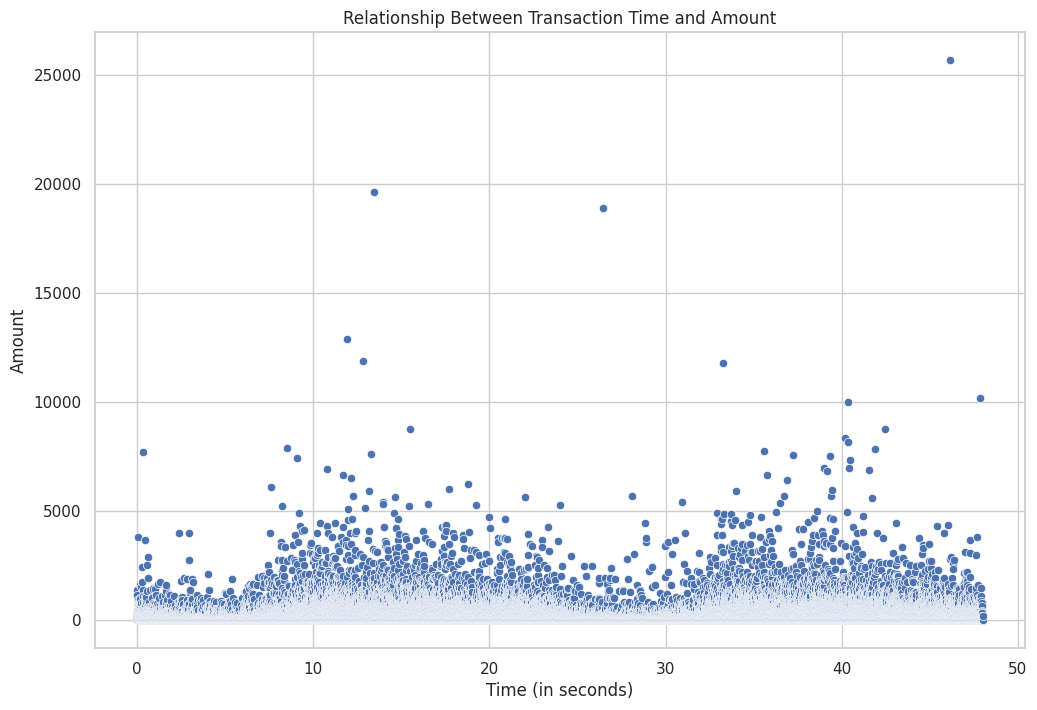

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df1 is already loaded and contains 'Time' and 'Amount' columns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x='Time', y='Amount')

# Adding labels and title
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.title('Relationship Between Transaction Time and Amount')

# Show the plot
plt.show()


SCALE DỮ LIỆU VÀ XỬ LÝ OUTLIER

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

#RobustScaler rất hữu ích trong các tình huống mà dữ liệu có nhiều ngoại lệ hoặc khi phân phối của dữ liệu không đồng đều.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df1['scaled_amount'] = rob_scaler.fit_transform(df1['Amount'].values.reshape(-1,1))
df1['scaled_time'] = rob_scaler.fit_transform(df1['Time'].values.reshape(-1,1))

df1.drop(['Time','Amount'], axis=1, inplace=True)

<ipython-input-46-75ea7866ac9c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['scaled_amount'] = rob_scaler.fit_transform(df1['Amount'].values.reshape(-1,1))
<ipython-input-46-75ea7866ac9c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['scaled_time'] = rob_scaler.fit_transform(df1['Time'].values.reshape(-1,1))
<ipython-input-46-75ea7866ac9c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

In [ ]:
scaled_amount = df1['scaled_amount']
scaled_time = df1['scaled_time']

df1.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df1.insert(0, 'scaled_amount', scaled_amount)
df1.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df1.head()

<ipython-input-47-78297c04e981>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
df1 = df1.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df1.loc[df1['Class'] == 1]
non_fraud_df = df1.loc[df1['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
269041,0.667223,0.926143,-2.339719,1.328675,-3.507216,-0.121997,-0.744115,-0.485322,-0.713318,1.863409,...,-1.027112,0.160230,0.165662,0.476692,-1.139609,-1.872074,-0.353387,-0.523108,-0.289756,0
276071,-0.028508,0.965887,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,...,0.037438,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,1
79525,-0.292032,-0.312980,-2.630598,5.125759,-6.092255,5.527393,1.605145,-2.319884,-3.207076,-1.482583,...,0.948864,-0.527474,0.220546,-1.371110,-0.504899,0.382307,0.395528,0.782036,0.628528,1
11343,-0.292032,-0.763051,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,...,1.002764,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1
58422,2.594632,-0.426738,-2.790771,-1.464269,1.031165,1.921356,-0.090014,-0.483871,0.780731,-0.348776,...,-1.376721,-0.392667,0.440020,0.777659,0.418552,0.244563,-0.159361,0.060540,0.356958,1


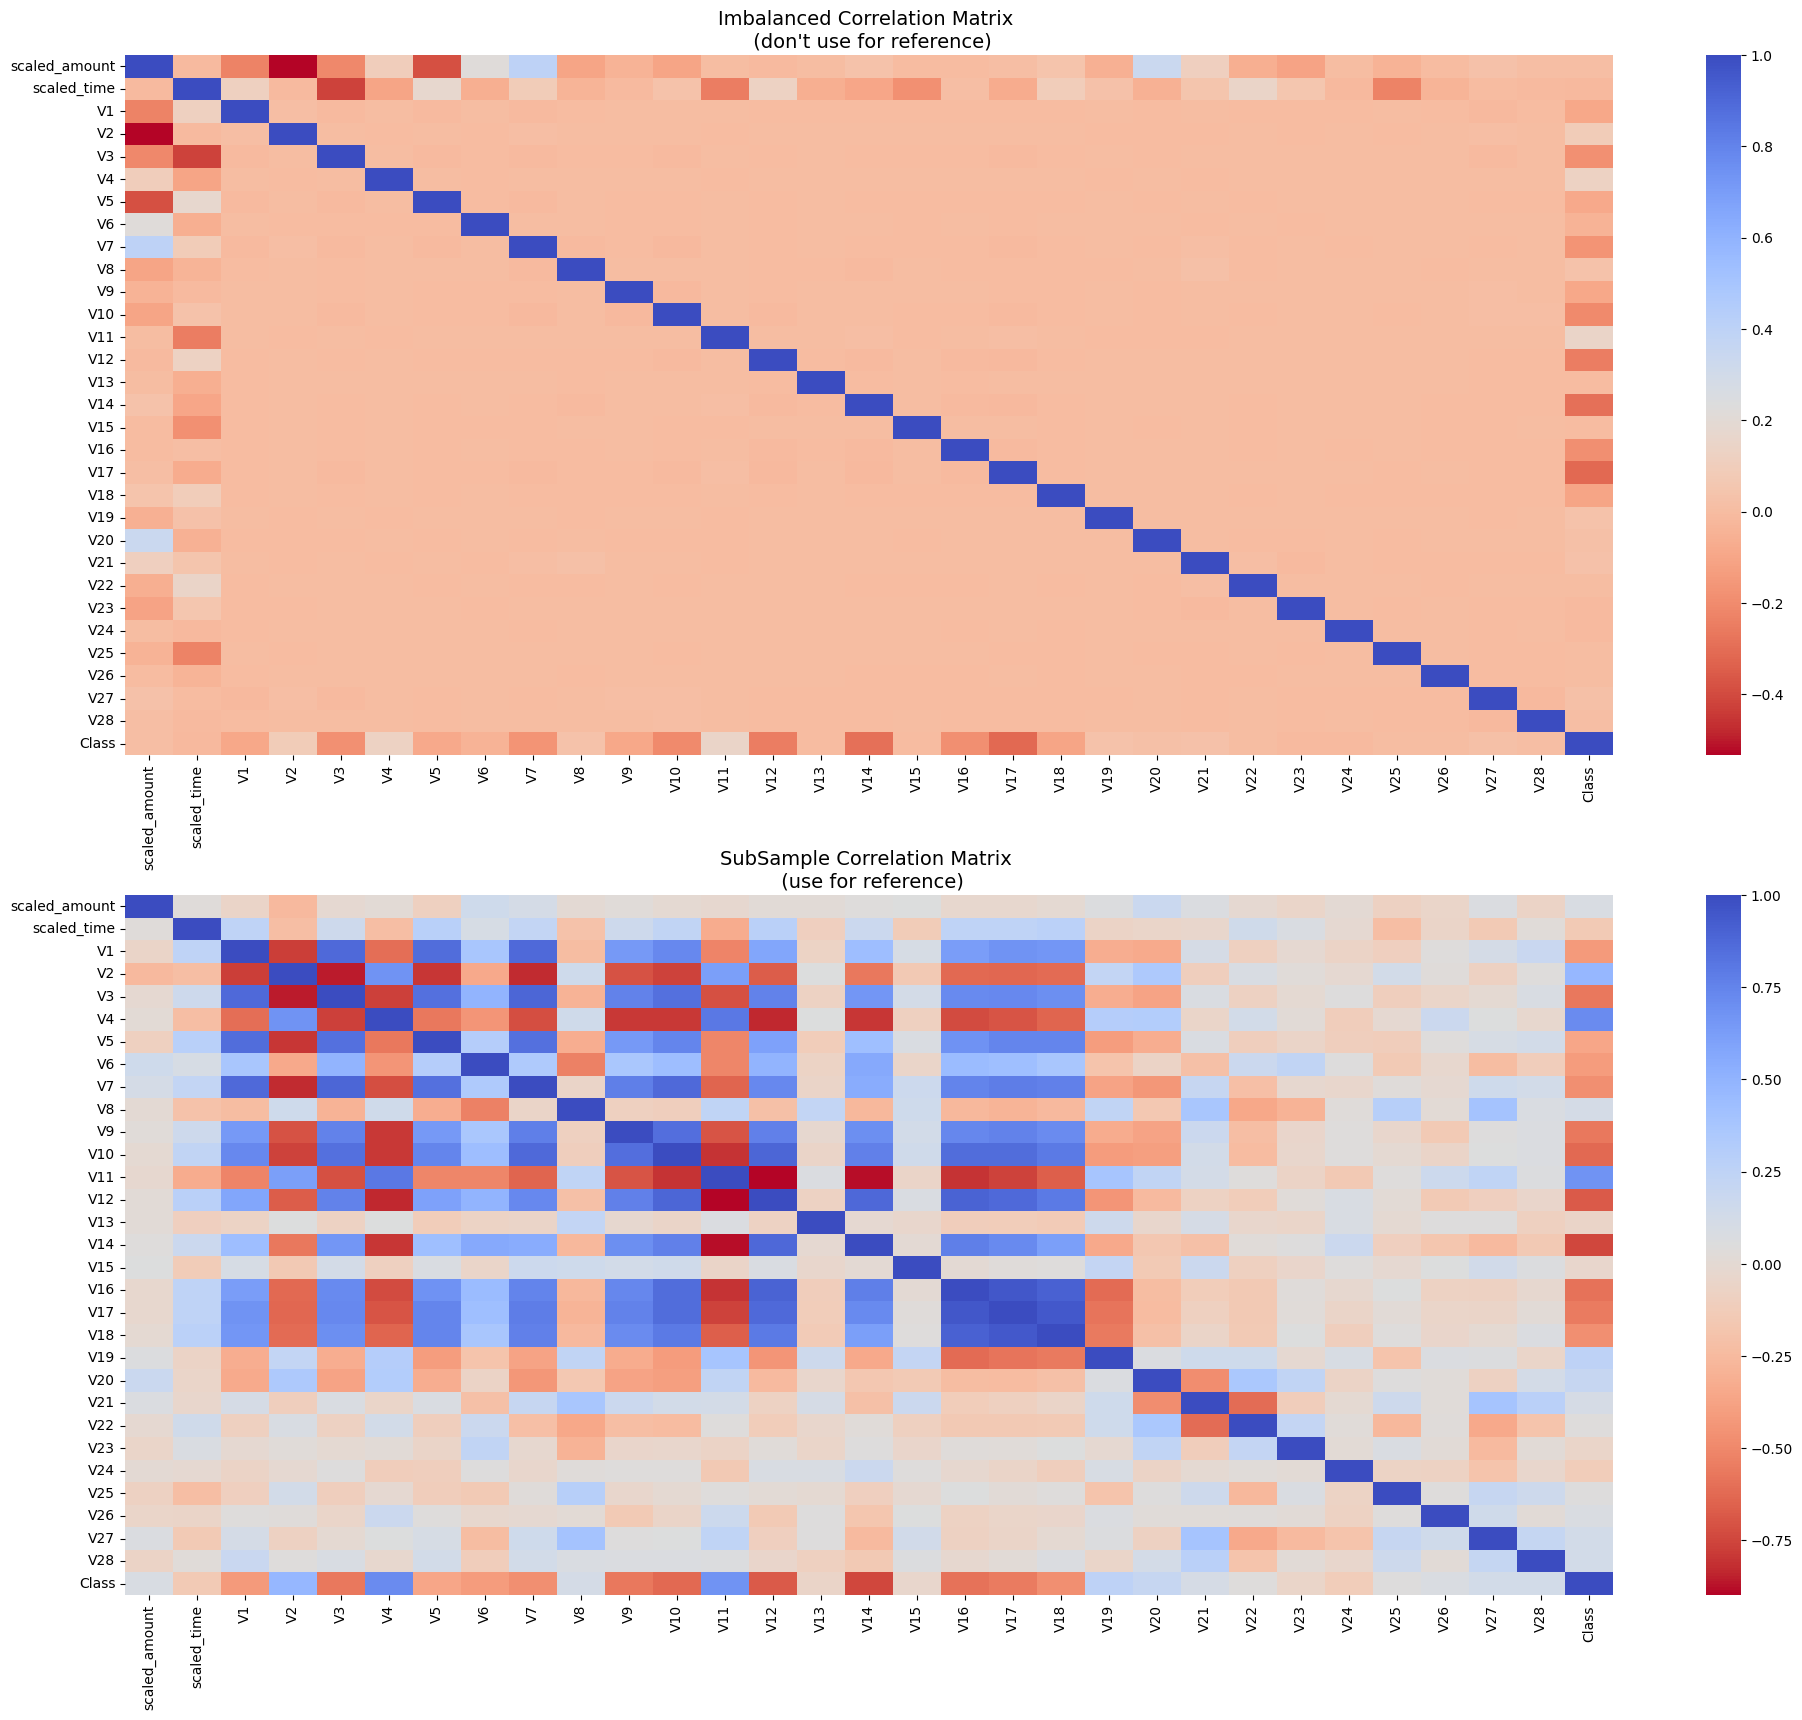

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df1.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

The variables V17, V19, V2, and V10 have a moderate correlation with the Class variable.
Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

<ipython-input-51-a4154a7ce19a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
<ipython-input-51-a4154a7ce19a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
<ipython-input-51-a4154a7ce19a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
<ipython-input-51-a4154a7ce19a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

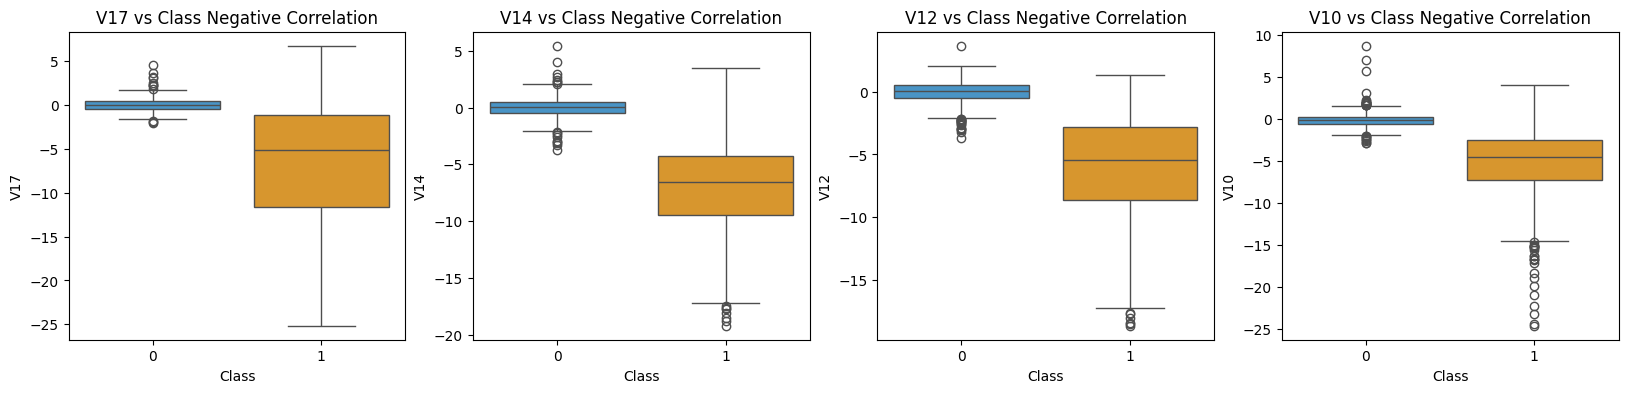

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

<ipython-input-52-2510e8085e46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
<ipython-input-52-2510e8085e46>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
<ipython-input-52-2510e8085e46>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
<ipython-input-52-2510e8085e46>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

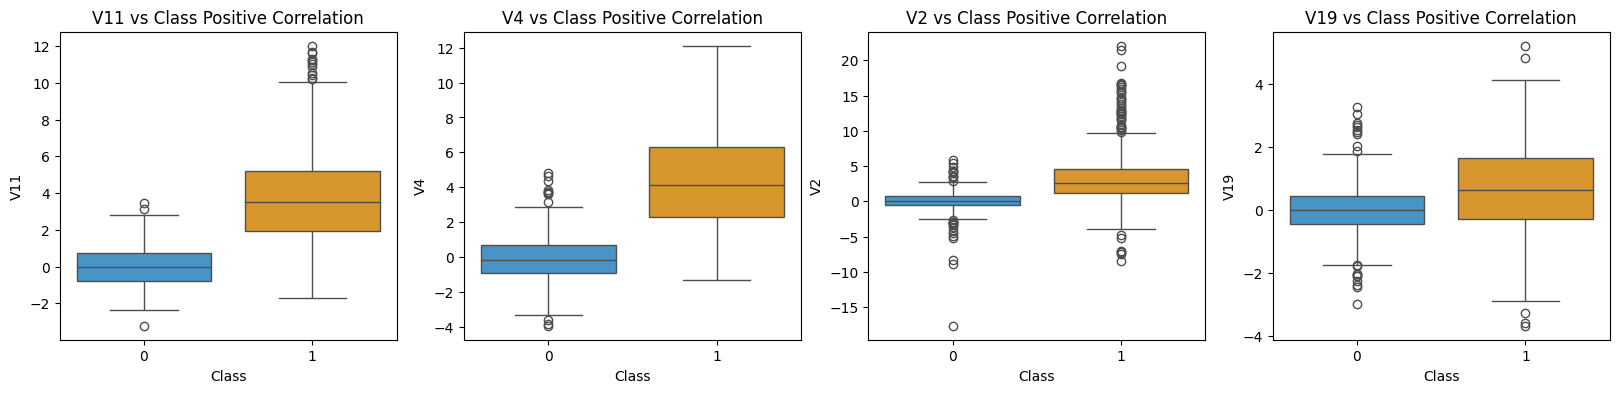

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

<ipython-input-53-59787bdd53f6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
<ipython-input-53-59787bdd53f6>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
<ipython-input-53-59787bdd53f6>:1

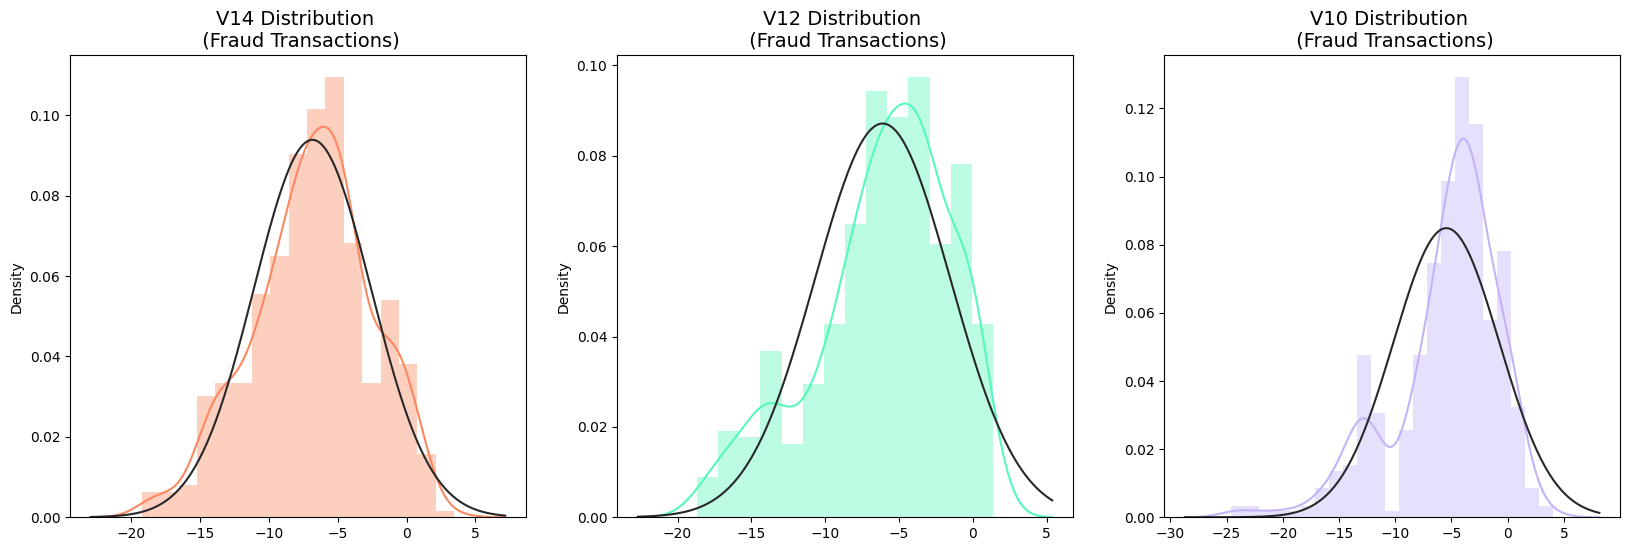

In [ ]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [ ]:
 # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.50514082568186 | Quartile 75: -4.25246559869278
iqr: 5.25267522698908
Cut Off: 7.87901284048362
V14 Lower: -17.38415366616548
V14 Upper: 3.62654724179084
Feature V14 Outliers for Fraud Cases: 7
V10 outliers:[-18.4937733551053, -17.4759212828566, -18.0499976898594, -17.6206343516773, -17.7216383537133, -19.2143254902614, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -16.971245282033493
V12 Upper: 5.672071569485119
V12 outliers: [-18.0475965708216, -18.6837146333443, -18.5536970096458, -17.1504052507291, -17.1829184301947, -17.003289445516, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 7
Number of Instances after outliers removal: 949
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<ipython-input-55-3983bcdc8a91>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
<ipython-input-55-3983bcdc8a91>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
<ipython-input-55-3983bcdc8a91>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)


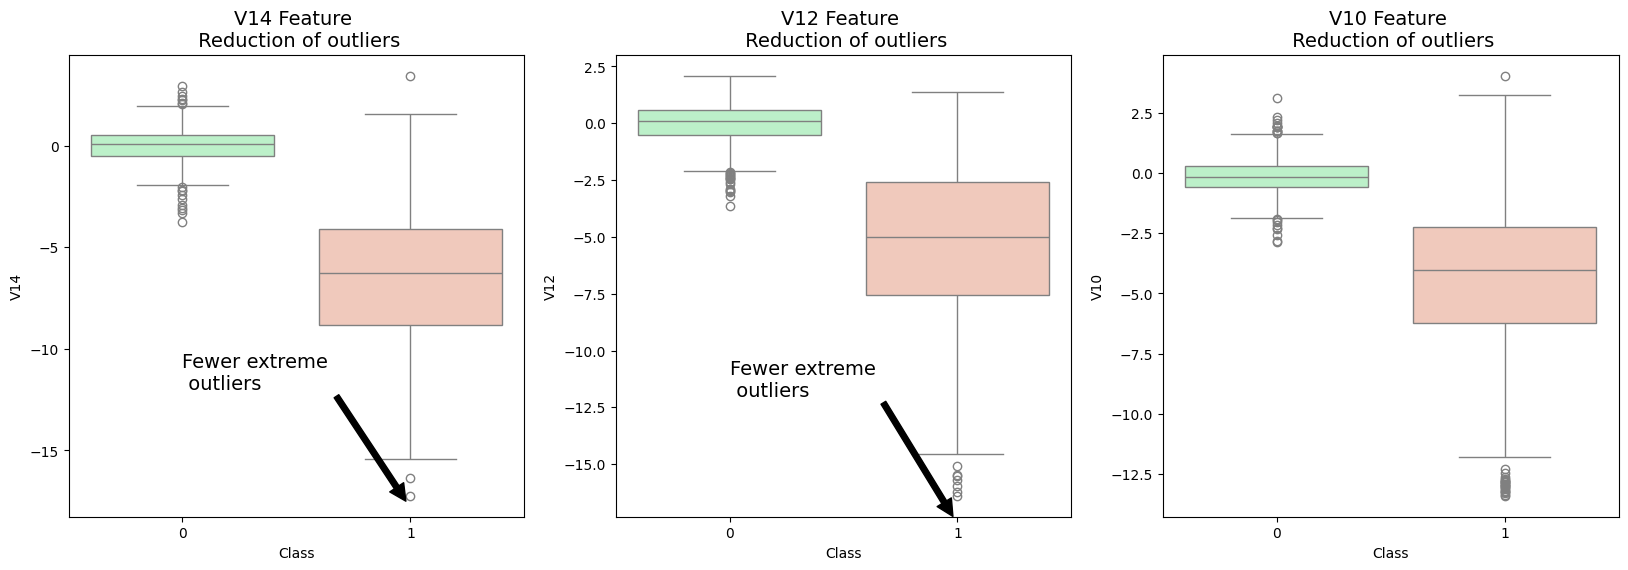

In [ ]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()


THỰC HIỆN MODELING


In [ ]:
new_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
269041,0.667223,0.926143,-2.339719,1.328675,-3.507216,-0.121997,-0.744115,-0.485322,-0.713318,1.863409,...,-1.027112,0.160230,0.165662,0.476692,-1.139609,-1.872074,-0.353387,-0.523108,-0.289756,0
276071,-0.028508,0.965887,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,...,0.037438,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,1
79525,-0.292032,-0.312980,-2.630598,5.125759,-6.092255,5.527393,1.605145,-2.319884,-3.207076,-1.482583,...,0.948864,-0.527474,0.220546,-1.371110,-0.504899,0.382307,0.395528,0.782036,0.628528,1
11343,-0.292032,-0.763051,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,...,1.002764,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1
58422,2.594632,-0.426738,-2.790771,-1.464269,1.031165,1.921356,-0.090014,-0.483871,0.780731,-0.348776,...,-1.376721,-0.392667,0.440020,0.777659,0.418552,0.244563,-0.159361,0.060540,0.356958,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123570,2.232791,-0.090636,-1.730728,-0.880104,2.509493,2.867601,-1.198485,1.691322,-1.005219,1.117692,...,0.168677,-0.313618,-0.778418,0.345828,-0.021248,-0.041181,0.229216,0.010236,-0.096511,0
33276,-0.134752,-0.558511,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,...,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,1
16780,1.084550,-0.664559,-27.143678,15.365804,-28.407424,6.370895,-20.087878,-4.666313,-18.709479,17.903574,...,1.703888,1.796826,-1.960974,-0.902247,0.144011,2.024388,-0.204214,1.332153,0.385891,1
269030,0.564734,0.926108,1.845828,0.359027,-1.222742,3.724936,0.694074,0.027421,0.403851,-0.034137,...,-0.285169,-0.114363,-0.542256,0.207178,0.504820,-0.050089,-0.159089,-0.078525,-0.041816,0


In [ ]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']


In [ ]:
X

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
269041,0.667223,0.926143,-2.339719,1.328675,-3.507216,-0.121997,-0.744115,-0.485322,-0.713318,1.863409,...,0.934626,-1.027112,0.160230,0.165662,0.476692,-1.139609,-1.872074,-0.353387,-0.523108,-0.289756
276071,-0.028508,0.965887,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,...,0.423099,0.037438,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470
79525,-0.292032,-0.312980,-2.630598,5.125759,-6.092255,5.527393,1.605145,-2.319884,-3.207076,-1.482583,...,-2.028885,0.948864,-0.527474,0.220546,-1.371110,-0.504899,0.382307,0.395528,0.782036,0.628528
11343,-0.292032,-0.763051,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,...,0.753150,1.002764,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288
58422,2.594632,-0.426738,-2.790771,-1.464269,1.031165,1.921356,-0.090014,-0.483871,0.780731,-0.348776,...,1.403574,-1.376721,-0.392667,0.440020,0.777659,0.418552,0.244563,-0.159361,0.060540,0.356958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123570,2.232791,-0.090636,-1.730728,-0.880104,2.509493,2.867601,-1.198485,1.691322,-1.005219,1.117692,...,0.777925,0.168677,-0.313618,-0.778418,0.345828,-0.021248,-0.041181,0.229216,0.010236,-0.096511
33276,-0.134752,-0.558511,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,...,3.025261,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593
16780,1.084550,-0.664559,-27.143678,15.365804,-28.407424,6.370895,-20.087878,-4.666313,-18.709479,17.903574,...,0.783578,1.703888,1.796826,-1.960974,-0.902247,0.144011,2.024388,-0.204214,1.332153,0.385891
269030,0.564734,0.926108,1.845828,0.359027,-1.222742,3.724936,0.694074,0.027421,0.403851,-0.034137,...,-1.352393,-0.285169,-0.114363,-0.542256,0.207178,0.504820,-0.050089,-0.159089,-0.078525,-0.041816


In [ ]:
y

269041    0
276071    1
79525     1
11343     1
58422     1
         ..
123570    0
33276     1
16780     1
269030    0
154694    1
Name: Class, Length: 917, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XỬ LÝ IMBALANCE

In [ ]:
nofraud_X_train = X_train[y_train == 0]
nofraud_X_train

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
71460,0.018634,-0.357085,-1.437532,1.031568,2.118777,1.088424,0.330449,0.958455,0.281079,0.430987,...,-2.256729,-0.456846,0.321096,0.639771,-0.142505,-0.340431,-0.127383,-0.090893,-0.459274,0.133599
178126,0.742873,0.455894,2.126004,-0.889102,-2.253168,-1.496305,0.717280,0.734186,-0.413152,0.118524,...,1.054503,0.213206,0.098636,-0.135918,0.290918,3.108809,-0.025882,-0.480912,-0.088309,-0.032673
180134,-0.167014,0.466565,0.121278,0.995051,0.196623,-0.027689,1.053250,-0.088969,1.082579,-1.474308,...,0.994188,-0.015682,0.572967,-0.314593,0.277416,0.622545,-1.445407,-0.103599,-0.165544,-0.170392
194685,-0.014602,0.540871,2.088058,-0.819377,-0.315259,-0.361890,-1.108503,-0.626473,-0.805790,-0.140935,...,-0.851203,-0.534074,-0.608390,-1.167346,0.503779,-0.120349,-0.745990,0.238093,-0.008277,-0.036400
114599,-0.243082,-0.131027,-0.620267,0.904377,1.893362,2.035162,0.905434,0.138621,0.958648,-0.416769,...,0.347910,-0.000962,-0.209806,-0.236227,0.214210,-0.031692,-0.669902,-0.336881,-0.361746,-0.342146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199718,-0.305799,0.568899,-1.783150,1.260113,-1.845450,-1.157239,0.463200,-0.343367,0.016792,1.082118,...,0.429675,-0.031644,-0.120026,-0.382800,-0.144052,-0.113811,0.233190,-0.144325,-0.223320,-0.394194
102462,-0.180921,-0.193664,-0.440188,1.048688,1.469440,-0.100059,0.442238,-0.476032,1.014575,-0.353539,...,-0.469759,0.333510,-0.374253,-0.562353,-0.053218,0.014609,-0.242551,0.050378,0.046185,-0.294135
219778,0.062717,0.671986,2.178437,-0.853357,-1.492001,-1.143265,-0.278349,-0.455338,-0.522634,-0.051975,...,1.196604,-0.045439,-0.044313,-0.321347,0.277731,0.297061,-0.220503,-0.454081,-0.054110,-0.063721
142958,-0.293422,0.004096,0.764311,1.548052,-1.917389,1.264634,1.640974,-1.070748,1.160537,-0.474223,...,0.171616,0.365252,-0.290215,-0.227929,-0.094529,-0.863650,-0.403009,-0.417398,0.027480,-0.388268


In [ ]:
fraud_X_train = X_train[y_train == 1]
fraud_X_train

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
154633,0.000556,0.207132,-1.020632,1.496959,-4.490937,1.836727,0.627318,-2.735569,-1.546274,0.459822,...,1.011626,0.443489,0.773631,0.860618,-0.304666,-0.155500,0.412166,-0.220080,0.392338,-0.020089
8617,-0.292032,-0.858558,0.919137,4.199633,-7.535607,7.426940,1.118215,-2.886722,-1.341036,0.363933,...,-0.287189,0.535435,0.316094,0.055179,0.210692,-0.417918,-0.911188,0.466524,0.627393,0.157851
44556,-0.292032,-0.501820,-4.566342,3.353451,-4.572028,3.616119,-2.493138,-1.090000,-5.551433,0.447783,...,0.936940,-0.249128,2.674466,-0.020880,-0.302447,-0.086396,-0.516060,-0.295102,0.195985,0.141115
30442,-0.242525,-0.573095,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,...,2.525785,0.757287,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050
64460,1.084550,-0.394126,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,7.704449,...,0.469554,0.860912,0.942593,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27749,-0.041441,-0.587655,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,...,0.432054,1.085760,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195
229730,-0.275066,0.720780,1.894036,1.905806,-3.515730,4.508913,2.044466,-1.420468,1.057480,-0.281157,...,-1.950060,-0.160163,-0.144713,-0.310108,-0.101530,-0.414960,0.376597,0.150778,-0.013712,0.048084
45732,-0.292032,-0.496144,-3.843009,3.375110,-5.492893,6.136378,2.797195,-2.646162,-1.668931,-2.617552,...,-1.439608,0.054796,-1.277812,0.719652,0.451125,-0.258094,0.656129,0.556676,0.739383,-0.203050
234574,-0.305938,0.744307,-1.053840,4.362801,-6.023534,5.304534,1.480738,-2.193821,-1.530817,0.626857,...,-1.802332,0.531574,0.397954,-0.945402,-0.376138,-0.220480,0.264003,0.048935,0.847220,0.531932


In [ ]:
oversampling_fraud_X_train = fraud_X_train.sample(len(nofraud_X_train), replace=True)
oversampling_fraud_X_train

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
15506,1.084550,-0.679178,-21.885434,12.930505,-24.098872,6.203314,-16.466099,-4.459842,-16.519836,14.535565,...,1.104355,1.611998,1.762232,-1.579055,-0.951043,0.134565,1.507110,-0.222671,1.527655,0.453699
82400,-0.041997,-0.297409,-7.626924,-6.976420,-2.077911,3.416754,4.458758,-5.080408,-6.578948,1.760341,...,0.254772,2.875260,1.224795,-0.656639,-0.330811,-0.078946,0.270306,0.431119,0.821381,-1.056088
80760,1.278264,-0.306141,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,...,2.314165,0.724381,-0.575924,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321
157918,8.525935,0.304660,-1.101035,-1.674928,-0.573388,5.617556,0.765556,0.440607,1.934740,-1.019788,...,0.752761,-0.038314,-0.412526,-0.208823,0.344833,1.091435,-0.686513,0.075809,0.033865,-0.832855
14104,-0.262550,-0.700379,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,...,-1.563815,-0.185455,-0.377503,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15736,1.084550,-0.676076,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,...,0.978636,1.640037,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315
123238,-0.292032,-0.092081,1.140208,1.156431,-1.471578,2.076278,0.774809,-1.002532,0.264948,0.013162,...,-1.094716,-0.125097,-0.387895,-0.866812,-0.121583,-0.356109,0.634573,-0.306311,0.094087,0.121065
192687,3.534557,0.530189,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,-0.444418,...,-0.002021,0.361169,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881
154719,-0.305938,0.211280,-4.991758,5.213340,-9.111326,8.431986,-3.435516,-1.827565,-7.114303,3.431207,...,1.560479,0.098132,1.189423,0.247858,0.294448,-0.548504,-0.174617,0.406703,-0.402339,-0.882886


In [ ]:
oversampling_fraud_y_train = y_train[oversampling_fraud_X_train.index]
oversampling_fraud_y_train

15506     1
82400     1
80760     1
157918    1
14104     1
         ..
15736     1
123238    1
192687    1
154719    1
47802     1
Name: Class, Length: 398, dtype: int64

In [ ]:
oversampling_X_train = pd.concat([nofraud_X_train.reset_index(), oversampling_fraud_X_train.reset_index()], axis=0)
oversampling_X_train

,index,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,71460,0.018634,-0.357085,-1.437532,1.031568,2.118777,1.088424,0.330449,0.958455,0.281079,...,-2.256729,-0.456846,0.321096,0.639771,-0.142505,-0.340431,-0.127383,-0.090893,-0.459274,0.133599
1,178126,0.742873,0.455894,2.126004,-0.889102,-2.253168,-1.496305,0.717280,0.734186,-0.413152,...,1.054503,0.213206,0.098636,-0.135918,0.290918,3.108809,-0.025882,-0.480912,-0.088309,-0.032673
2,180134,-0.167014,0.466565,0.121278,0.995051,0.196623,-0.027689,1.053250,-0.088969,1.082579,...,0.994188,-0.015682,0.572967,-0.314593,0.277416,0.622545,-1.445407,-0.103599,-0.165544,-0.170392
3,194685,-0.014602,0.540871,2.088058,-0.819377,-0.315259,-0.361890,-1.108503,-0.626473,-0.805790,...,-0.851203,-0.534074,-0.608390,-1.167346,0.503779,-0.120349,-0.745990,0.238093,-0.008277,-0.036400
4,114599,-0.243082,-0.131027,-0.620267,0.904377,1.893362,2.035162,0.905434,0.138621,0.958648,...,0.347910,-0.000962,-0.209806,-0.236227,0.214210,-0.031692,-0.669902,-0.336881,-0.361746,-0.342146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,15736,1.084550,-0.676076,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,...,0.978636,1.640037,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315
394,123238,-0.292032,-0.092081,1.140208,1.156431,-1.471578,2.076278,0.774809,-1.002532,0.264948,...,-1.094716,-0.125097,-0.387895,-0.866812,-0.121583,-0.356109,0.634573,-0.306311,0.094087,0.121065
395,192687,3.534557,0.530189,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,...,-0.002021,0.361169,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881
396,154719,-0.305938,0.211280,-4.991758,5.213340,-9.111326,8.431986,-3.435516,-1.827565,-7.114303,...,1.560479,0.098132,1.189423,0.247858,0.294448,-0.548504,-0.174617,0.406703,-0.402339,-0.882886


In [ ]:
oversampling_y_train = pd.concat([y_train[y_train == 0].reset_index(), oversampling_fraud_y_train.reset_index()], axis=0)
oversampling_y_train

,index,Class
0,71460,0
1,178126,0
2,180134,0
3,194685,0
4,114599,0
...,...,...
393,15736,1
394,123238,1
395,192687,1
396,154719,1


In [ ]:
oversampling_X_train.drop(columns=['index'], inplace=True)
oversampling_y_train.drop(columns=['index'], inplace=True)

MODELING


THỬ MÔ HÌNH KHI KHÔNG XỬ LÝ IMBALANCE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GridSearchCV(RandomForestClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
    GridSearchCV(KNeighborsClassifier(), param_grid={
        'n_neighbors': [10, 50, 100, 200],
    }),
    GridSearchCV(SVC(), param_grid={
        'C': [1, 10],
        'kernel': ['linear', 'rbf'],
    }),
    GridSearchCV(AdaBoostClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
    GridSearchCV(GradientBoostingClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
    GridSearchCV(LGBMClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
    GridSearchCV(XGBClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
]

In [ ]:
for model in models:
    _model = model
    _model.fit(X_train, y_train)
    pred = _model.predict(X_test)
    print('-'*10)
    print(_model)
    try:
      print(f"BEST PARAM: {_model.best_params_}")
    except:
      pass
    print(classification_report(y_test, pred))
    print('-'*10)


----------
LogisticRegression()
              precision    recall  f1-score   support

           0       0.88      0.96      0.91        89
           1       0.95      0.87      0.91        95

    accuracy                           0.91       184
   macro avg       0.92      0.91      0.91       184
weighted avg       0.92      0.91      0.91       184

----------
----------
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        89
           1       0.85      0.88      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

----------
----------
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.96      0.90  

In [ ]:
Không imbalance, modeling GradientBoostingClassifier tốt nhất accuracy 0.93 đồng thời chỉ số f1 ở lớp 1 là 93%

THỬ MÔ HÌNH KHI XỬ LÝ IMBALANCE

In [ ]:
for model in models:
    _model = model
    _model.fit(oversampling_X_train, oversampling_y_train)
    pred = _model.predict(X_test)
    print('-'*10)
    print(_model)
    try:
      print(f"BEST PARAM: {_model.best_params_}")
    except:
      pass
    print(classification_report(y_test, pred))
    print('-'*10)


----------
LogisticRegression()
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        89
           1       0.93      0.85      0.89        95

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

----------
----------
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.86      0.93      0.90        89
           1       0.93      0.86      0.90        95

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

----------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

----------
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        89
           1       0.95      0.86      0.91        95

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

----------


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

----------
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 50, 100, 200]})
BEST PARAM: {'n_neighbors': 10}
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        89
           1       0.99      0.83      0.90        95

    accuracy                           0.91       184
   macro avg       0.92      0.91      0.91       184
weighted avg       0.92      0.91      0.91       184

----------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

----------
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})
BEST PARAM: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.89      0.97      0.92        89
           1       0.97      0.88      0.92        95

    accuracy                           0.92       184
   macro avg       0.93      0.93      0.92       184
weighted avg       0.93      0.92      0.92       184

----------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

----------
GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        89
           1       0.93      0.85      0.89        95

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

----------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

----------
GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        89
           1       0.99      0.87      0.93        95

    accuracy                           0.93       184
   macro avg       0.93      0.93      0.93       184
weighted avg       0.94      0.93      0.93       184

----------
[LightGBM] [Info] Number of positive: 318, number of negative: 318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6283
[LightGBM] [Info] Number of data points in the train set: 636, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 318, number of negative: 319
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6301
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499215 -> initscore=-0.003140
[LightGBM] [Info] Start training from score -0.003140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Info] Number of positive: 319, number of negative: 318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6300
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500785 -> initscore=0.003140
[LightGBM] [Info] Start training from score 0.003140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Info] Number of positive: 318, number of negative: 318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6283
[LightGBM] [Info] Number of data points in the train set: 636, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 319, number of negative: 318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6292
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500785 -> initscore=0.003140
[LightGBM] [Info] Start training from score 0.003140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 318, number of negative: 319
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6352
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499215 -> initscore=-0.003140
[LightGBM] [Info] Start training from score -0.003140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 318, number of negative: 319
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6301
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499215 -> initscore=-0.003140
[LightGBM] [Info] Start training from score -0.003140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 318, number of negative: 318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6283
[LightGBM] [Info] Number of data points in the train set: 636, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 319, number of negative: 318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6300
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500785 -> initscore=0.003140
[LightGBM] [Info] Start training from score 0.003140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 318, number of negative: 319
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6301
[LightGBM] [Info] Number of data points in the train set: 637, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499215 -> initscore=-0.003140
[LightGBM] [Info] Start training from score -0.003140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
----------
GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        89
           1       0.96      0.84      0.90        95

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.91      0.90      0.90       184

----------
----------
GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
     

In [ ]:
 imbalance, modeling GradientBoostingClassifier tốt nhất accuracy 0.93 đồng thời chỉ số f1 ở lớp 1 là 93%